#Learning to detect rectangles using one convolutional filter
* Create 1000 random images where 500 of them have rectangles in them. 
* Train one convolutional filter of size `5 x 5` to classfy these two sets of images.
* Investigate what the filter has learnt and why it works.
* Analyze the correctly and incorrectly classified examples.

In [0]:
import numpy as np
from skimage import draw
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
X = np.random.random((1000, 10, 10, 1))
Y = np.zeros((1000, 1))

for i in range(0, 1000, 2):
    randomx = 2 + int(np.random.random() * 6)
    randomy = 2 + int(np.random.random() * 6)
    randoml = 1
    rr, cc = draw.rectangle_perimeter( start = (randomx, randomy), extent = (randoml, randoml), shape=(10, 10))
    X[i+1, rr, cc, 0] = 1
    Y[i+1] = 1

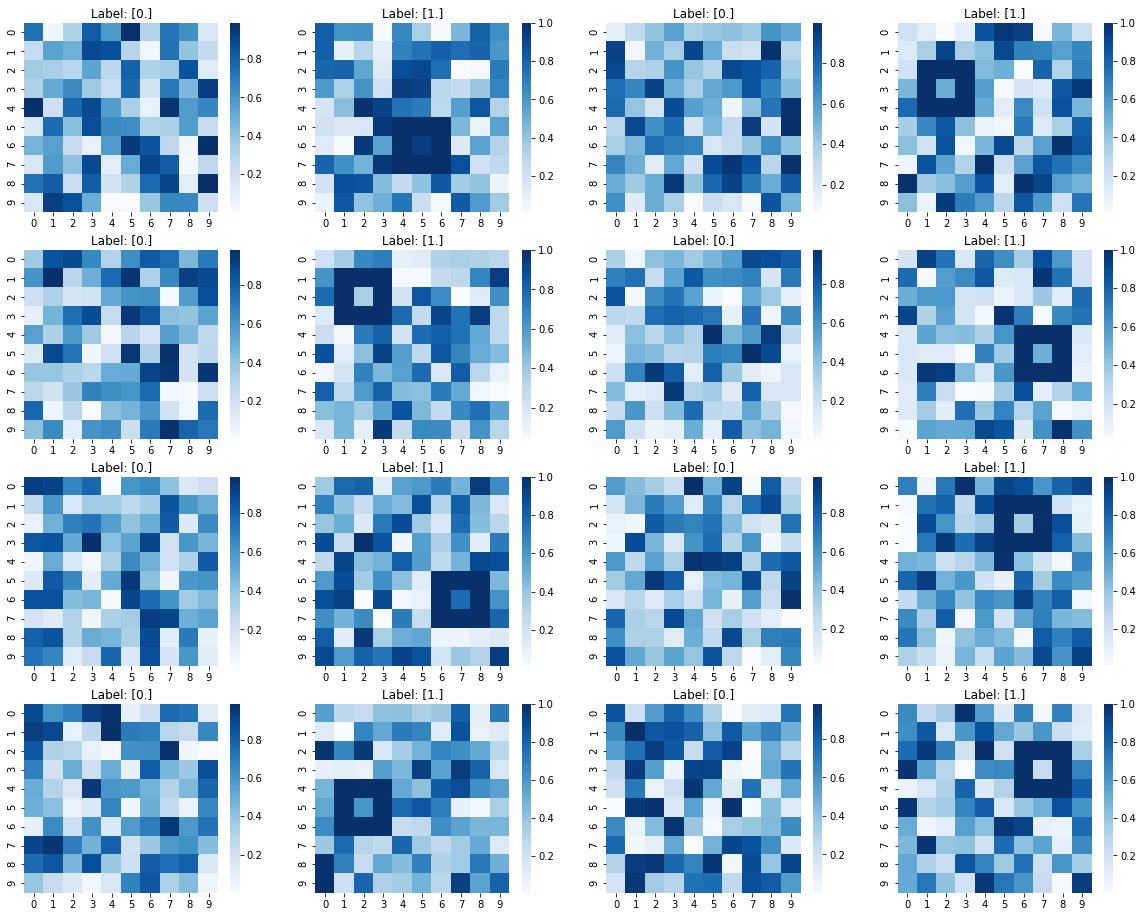

In [3]:
# Visualize first 16 inputs and outputs
L = 4
plt.figure(figsize=(20,16))
for p in range(0, L):
    for q in range(0, L):
        plt.subplot(L, L, p * L + q + 1)
        sns.heatmap(X[p * L + q, :, :, 0], cmap='Blues')
        plt.title('Label: ' + str(Y[p * L + q]))
plt.show()

In [4]:
print(X.shape, Y.shape)

(1000, 10, 10, 1) (1000, 1)


In [5]:
# Build a CNN model with only one 5x5 filter
from tensorflow.python.keras.layers import Input, Convolution2D, Activation, GlobalMaxPool2D
from tensorflow.python.keras.models import Model
my_input = Input(shape = (10, 10, 1))
my_output = Convolution2D(1, (5, 5))(my_input)
my_output = Activation('sigmoid')(my_output)
my_output = GlobalMaxPool2D()(my_output)
model = Model(my_input, my_output)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [6]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 10, 10, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 6, 6, 1)           26        
_________________________________________________________________
activation (Activation)      (None, 6, 6, 1)           0         
_________________________________________________________________
global_max_pooling2d (Global (None, 1)                 0         
Total params: 26
Trainable params: 26
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

(5, 5, 1, 1)


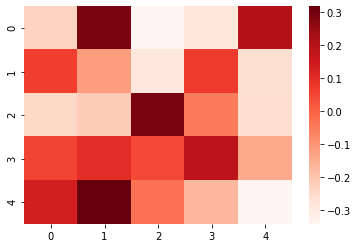

In [8]:
# Pull out the weights of the filter
filter_weights = model.get_weights()[0]
print(filter_weights.shape)
sns.heatmap(filter_weights[:, :, 0, 0], cmap='Reds')
plt.show()

In [9]:
model.fit(X, Y, epochs = 1024, batch_size=10)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 1000 samples
Epoch 1/1024
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.6988 - acc: 0.4790
Epoch 2/1024
1000/1000 [==============================] - 0s 250us/sample - loss: 0.6942 - acc: 0.4980
Epoch 3/1024
1000/1000 [==============================] - 0s 279us/sample - loss: 0.6904 - acc: 0.5080
Epoch 4/1024
1000/1000 [==============================] - 0s 240us/sample - loss: 0.6857 - acc: 0.5320
Epoch 5/1024
1000/1000 [==============================] - 0s 266us/sample - loss: 0.6816 - acc: 0.5510
Epoch 6/1024
1000/1000 [==============================] - 0s 239us/sample - loss: 0.6776 - acc: 0.5440
Epoch 7/1024
1000/1000 [==============================] - 0s 269us/sample - loss: 0.6734 - acc: 0.5860
Epoch 8/1024
1000/1000 [==============================] - 0s 239us/sample - loss: 0.6691 - acc: 0.5730
Epoch 9/1024
1000/1000 [==============================] - 0s 2

(5, 5, 1, 1)


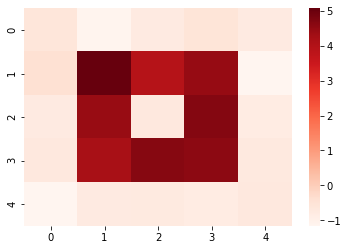

In [10]:
# Visualize the filter
filter_weights = model.get_weights()[0]
print(filter_weights.shape)
sns.heatmap(filter_weights[:, :, 0, 0], cmap = 'Reds')
plt.show()

In [0]:
# Create another model which can give us the output of the filter
my_input = Input(shape = (10, 10, 1))
my_output = Convolution2D(1, (5, 5))(my_input)
my_output = Activation('sigmoid')(my_output)
model_intermediate = Model(my_input, my_output)

# Load the weights of our model into this model
model.save_weights('a.hdf5')
model_intermediate.load_weights('a.hdf5')

In [0]:
# Obtain predictions and output of the CNN filter
P = model.predict(X)
O = model_intermediate.predict(X)

In [0]:
# Check for misclassified examples
for i in range(0, 1000):
    if np.round(P[i]) == Y[i]:
        continue
    plt.figure(figsze=(10, 4))
    plt.suptitle(str(Y[i]) + '    ' + str(P[i]))
    plt.subplot(1, 2, 1)
    sns.heatmap(X[i, :, :, 0], cmap = 'Blues')
    plt.subplot(1, 2, 2)
    sns.heatmap(O[i, :, :, 0], cmap = 'Oranges')
    plt.show()

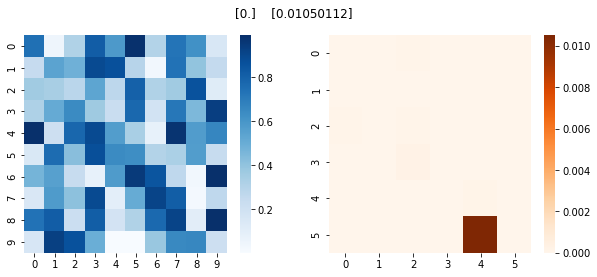

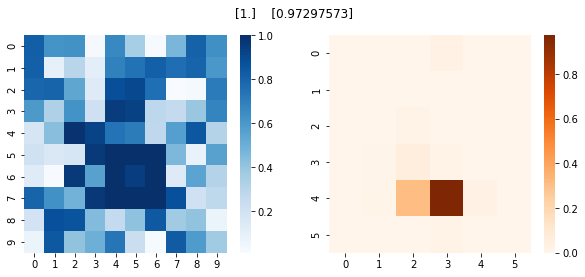

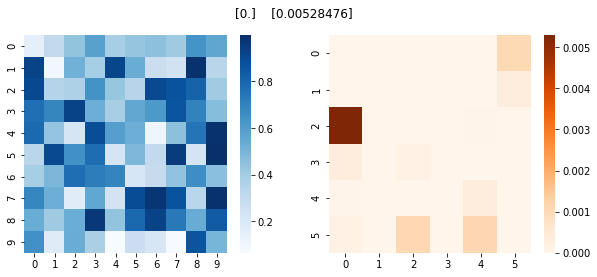

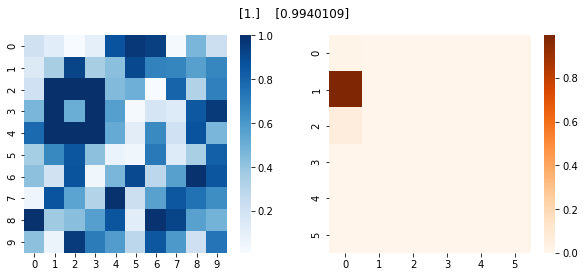

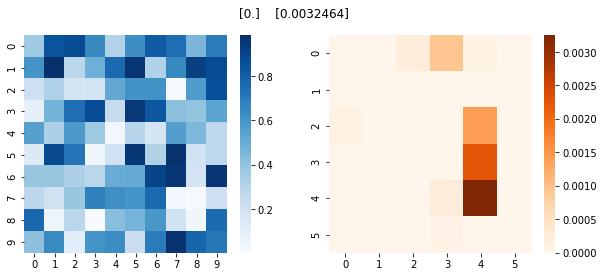

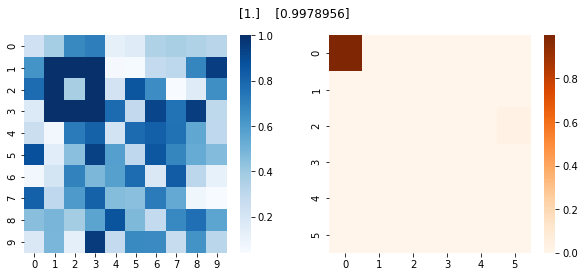

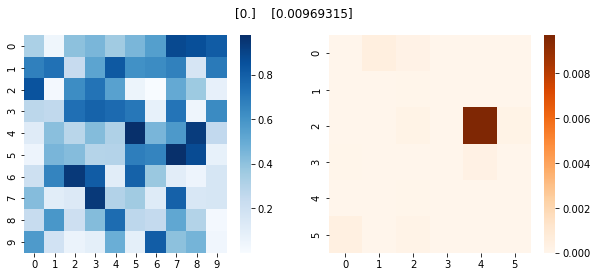

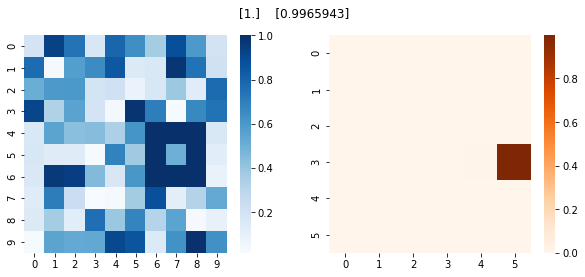

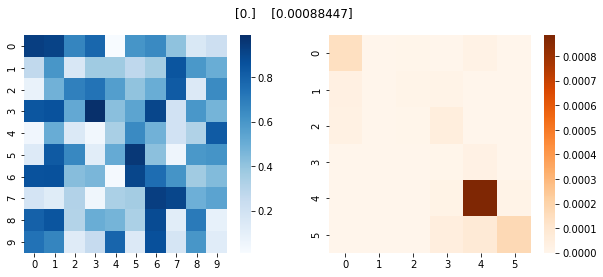

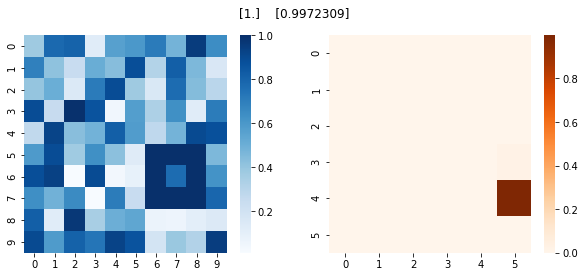

In [15]:
# Check for correctly classified examples
for i in range(0, 10):
    if np.round(P[i]) != Y[i]:
        continue
    plt.figure(figsize=(10, 4))
    plt.suptitle(str(Y[i]) + '    ' + str(P[i]))
    plt.subplot(1, 2, 1)
    sns.heatmap(X[i, :, :, 0], cmap = 'Blues')
    plt.subplot(1, 2, 2)
    sns.heatmap(O[i, :, :, 0], cmap = 'Oranges')
    plt.show()